In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
!pip install contextily
!pip install geopandas
!pip install lonboard

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import geopandas as gpd
import contextily as ctx
import rasterio as rio
from rasterio import plot

plt.rcParams['figure.figsize'] = [10, 8]


<Axes: >

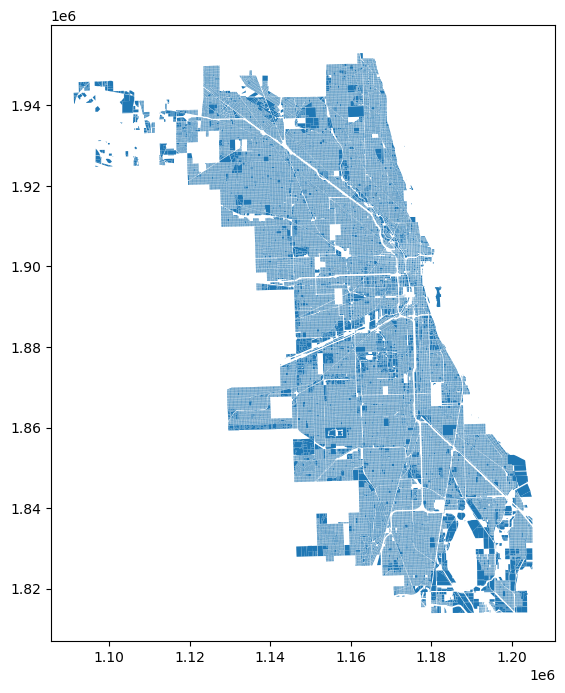

In [8]:
Chicago_tax = gpd.read_file('/content/drive/MyDrive/Colab Notebooks/data/chicago_parcels/Chicago_parcels.shp')
Chicago_tax.plot()

In [9]:
Chicago_tax.head()

,POLY_ID,ID,AREA,PIN_OLD,PIN,geometry
0,1,93,0.01,836300010,836300010,"POLYGON ((1091182.694 1942890.287, 1091173.159..."
1,2,94,0.00,836300011,836300011,"POLYGON ((1092430.298 1943191.955, 1092463.452..."
2,3,96,0.02,836300013,836300013,"POLYGON ((1092323.996 1942962.610, 1092301.306..."
3,4,95,0.01,836300012,836300012,"POLYGON ((1092024.119 1942447.762, 1091997.190..."
4,5,92,0.01,836300009,836300009,"POLYGON ((1091970.533 1942338.191, 1091929.082..."


In [10]:
import geopandas as gpd
from lonboard import Map, SolidPolygonLayer
from sklearn.cluster import KMeans

In [ ]:
layer = SolidPolygonLayer.from_geopandas(
    Chicago_tax,
    get_fill_color=[255, 0, 0],
)
map_ = Map(layers=[layer])
map_

/usr/local/lib/python3.10/dist-packages/lonboard/_layer.py:112: UserWarning: GeoDataFrame being reprojected to EPSG:4326
  warnings.warn("GeoDataFrame being reprojected to EPSG:4326")


Task 4: First we had to extract the longitude and latitude data from the geometry colomn. To do this, I created 3 new colomns for centroid, longitude and latitude using .assign. I the extracted the longitude and latitude data from the centroid.

In [33]:
Chicago_tax.shape

(592521, 9)

In [43]:
Centroid = Chicago_tax.centroid
print(Centroid)

0         POINT (1091780.062 1943041.685)
1         POINT (1092426.507 1943134.441)
2         POINT (1091688.490 1942695.301)
3         POINT (1091538.184 1942342.716)
4         POINT (1091543.397 1942082.620)
                       ...               
592516    POINT (1198345.480 1832294.386)
592517    POINT (1198484.292 1832295.456)
592518    POINT (1198674.118 1832296.782)
592519    POINT (1198812.925 1832298.304)
592520    POINT (1200427.060 1828505.599)
Length: 592521, dtype: geometry


In [50]:
Chicago_tax.assign(centroid = Centroid)

,POLY_ID,ID,AREA,PIN_OLD,PIN,geometry,Latitude,Longitude,kmeans_cluster,centroid
0,1,93,0.01,836300010,836300010,"POLYGON ((1091182.694 1942890.287, 1091173.159...",1.943042e+06,1.091780e+06,1,POINT (1091780.062 1943041.685)
1,2,94,0.00,836300011,836300011,"POLYGON ((1092430.298 1943191.955, 1092463.452...",1.943134e+06,1.092427e+06,1,POINT (1092426.507 1943134.441)
2,3,96,0.02,836300013,836300013,"POLYGON ((1092323.996 1942962.610, 1092301.306...",1.942695e+06,1.091688e+06,1,POINT (1091688.490 1942695.301)
3,4,95,0.01,836300012,836300012,"POLYGON ((1092024.119 1942447.762, 1091997.190...",1.942343e+06,1.091538e+06,1,POINT (1091538.184 1942342.716)
4,5,92,0.01,836300009,836300009,"POLYGON ((1091970.533 1942338.191, 1091929.082...",1.942083e+06,1.091543e+06,1,POINT (1091543.397 1942082.620)
...,...,...,...,...,...,...,...,...,...,...
592516,592517,588217,0.00,-2147483648,-2147483648,"POLYGON ((1198269.792 1832592.793, 1198394.873...",1.832294e+06,1.198345e+06,0,POINT (1198345.480 1832294.386)
592517,592518,588218,0.00,-2147483648,-2147483648,"POLYGON ((1198410.986 1832594.443, 1198534.158...",1.832295e+06,1.198484e+06,0,POINT (1198484.292 1832295.456)
592518,592519,588216,0.00,-2147483648,-2147483648,"POLYGON ((1198602.435 1832596.186, 1198724.787...",1.832297e+06,1.198674e+06,0,POINT (1198674.118 1832296.782)
592519,592520,588215,0.00,-2147483648,-2147483648,"POLYGON ((1198742.539 1832597.464, 1198864.615...",1.832298e+06,1.198813e+06,0,POINT (1198812.925 1832298.304)


In [35]:
x_coordinates = Centroid.x
y_coordinates = Centroid.y

print(x_coordinates)
print(y_coordinates)

0         1.091780e+06
1         1.092427e+06
2         1.091688e+06
3         1.091538e+06
4         1.091543e+06
              ...     
592516    1.198345e+06
592517    1.198484e+06
592518    1.198674e+06
592519    1.198813e+06
592520    1.200427e+06
Length: 592521, dtype: float64
0         1.943042e+06
1         1.943134e+06
2         1.942695e+06
3         1.942343e+06
4         1.942083e+06
              ...     
592516    1.832294e+06
592517    1.832295e+06
592518    1.832297e+06
592519    1.832298e+06
592520    1.828506e+06
Length: 592521, dtype: float64


In [51]:
Chicago_tax['Latitude'] = Chicago_tax.geometry.centroid.y
Chicago_tax['Longitude'] = Chicago_tax.geometry.centroid.x

Task 5 and 6 we needed to use K-Means Clustering and Implement K-Means clustering with different values of n_clusters and then visualize the clustering results for each value of n_clusters using plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  w

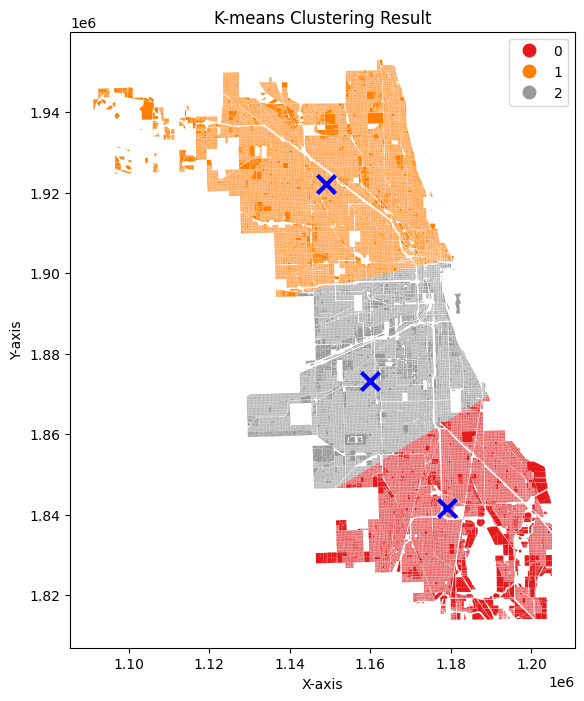

In [53]:
#Task 5 & 6
kmeans = KMeans(n_clusters=3, random_state=42)
Chicago_tax['kmeans_cluster'] = kmeans.fit_predict(Chicago_tax[['Longitude', 'Latitude']])

# Visualize K-means clustering result
Chicago_tax.plot(column='kmeans_cluster', categorical=True, legend=True, figsize=(8, 8), cmap='Set1')

# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    s=169,
    linewidths=3,
    color="b",
    zorder=10,
)
plt.title('K-means Clustering Result')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()

Task 7

In [25]:
def find_neighbors(Chicago_tax, point_index, epsilon):
    # Find indices of data points within epsilon distance from the given point
    distances = np.linalg.norm(Chicago_tax - Chicago_tax[point_index], axis=1)
    neighbors = np.where(distances <= epsilon)[0]
    return neighbors

In [26]:
def expand_cluster(Chicago_tax, point_index, neighbors, cluster_id, epsilon, min_samples, clusters, visited):
    # Assign the point to the current cluster
    clusters[point_index] = cluster_id

    # Expand the cluster by iterating over neighbors
    for neighbor_index in neighbors:
        if not visited[neighbor_index]:
            visited[neighbor_index] = True
            new_neighbors = find_neighbors(Chicago_tax, neighbor_index, epsilon)

            # Check if the neighbor has enough neighbors to be a core point
            if len(new_neighbors) >= min_samples:
                neighbors = np.union1d(neighbors, new_neighbors)

        # Assign the neighbor to the current cluster if not assigned to any cluster
        if clusters[neighbor_index] == -1:
            clusters[neighbor_index] = cluster_id

In [54]:
def dbscan(Chicago_tax, epsilon, min_samples):
    # Initialize variables
    num_points = len(Chicago_tax)
    clusters = np.full(num_points, -1)  # -1 represents unassigned points
    visited = np.full(num_points, False)

    # Initialize cluster ID
    cluster_id = 0

    for point_index in range(num_points):
        if not visited[point_index]:
            visited[point_index] = True
            neighbors = find_neighbors(Chicago_tax, point_index, epsilon)

            # Check if the point is a core point
            if len(neighbors) >= min_samples:
                expand_cluster(Chicago_tax, point_index, neighbors, cluster_id, epsilon, min_samples, clusters, visited)
                cluster_id += 1

    return clusters

In [55]:
epsilon = 1
min_samples = 5
clusters = dbscan(Chicago_tax, epsilon, min_samples)

# Visualize the results
plt.scatter(Chicago_tax[:, 0], Chicago_tax[:, 1], c=clusters, cmap='viridis', alpha=0.7)
plt.title('DBSCAN Clustering - Manual Implementation')
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.legend()
plt.show()

KeyError: ignored